In [1]:
# To read data and numerical calculation
import numpy as np
import pandas as pd
import os

# Graph plotting libaries
import seaborn as sns
import matplotlib.pyplot as plt

# Image viewing libaries
import cv2
import glob
from PIL import Image

# Tensorflow libaries
import tensorflow
# Used for generating random numbers
import random
# Used for serializing and deserializing Python objects
import pickle
# For working with file paths in a platform-independent way
from pathlib import Path

from img_viewer import display_image, num_class

# This function will be used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# CNN Model Archiecture 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# Metrices
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
X = []
y = []

dataset_path = 'C:\\Users\\prana\\OneDrive\\Desktop\\Python_Project\\Alzheimer_Classification\\Alzheimers-ADNI'

dir_list = os.listdir(dataset_path)

for directory in dir_list:
    img_path = os.path.join(dataset_path, directory)
    files = Path(img_path).glob('*')
    if directory == 'AD':
        for file in files:
            file = file.__str__()
            img = Image.open(file)
            img = img.resize((256, 256))
            img = np.array(img)
            X.append(img)
            y.append(0)
            
    elif directory == 'CN':
        for file in files:
            file = file.__str__()
            img = Image.open(file)
            img = img.resize((256, 256))
            img = np.array(img)
            X.append(img)
            y.append(1)
    elif directory == 'MCI':
        for file in files:
            file = file.__str__()
            img = Image.open(file)
            img = img.resize((256, 256))
            img = np.array(img)
            X.append(img)
            y.append(2)

X = np.array(X)
y = np.array(y)

In [3]:
print('X_shape', X.shape, '\n' 'Y_shape', y.shape)

X_shape (5154, 256, 256) 
Y_shape (5154,)


In [4]:
y_cat = to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.1, random_state=42)

In [6]:
print('X-train shape', X_train.shape, '\n''y-train shape', y_train.shape, '\n''X_test shape', 
      X_test.shape, '\n''y_test shape', y_test.shape)

X-train shape (4638, 256, 256) 
y-train shape (4638, 3) 
X_test shape (516, 256, 256) 
y_test shape (516, 3)


In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(256,256,1), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(3, activation='softmax'))

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [11]:
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

In [12]:
#df_history = pd.DataFrame(model.history.history)

In [13]:
#df_history.plot()

In [14]:
#with open('history.pkl', 'wb') as file:
#    pickle.dump(model.history.history, file)

In [15]:
with open('history.pkl', 'rb') as file:
    history = pickle.load(file)

In [16]:
df_history = pd.DataFrame(history)

In [17]:
df_history

,loss,val_loss
0,1.258263,0.545080
1,0.378016,0.269804
2,0.179035,0.253420
3,0.073445,0.029967
4,0.066346,0.042920
5,0.065614,0.132351
6,0.031270,0.017173
7,0.019279,0.019604
8,0.084682,0.042380
9,0.012704,0.006032


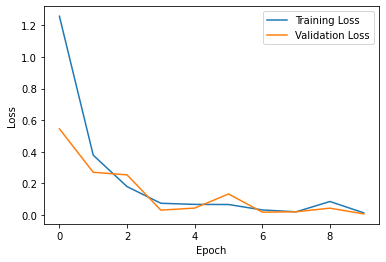

In [18]:
plt.plot(df_history['loss'], label='Training Loss')
plt.plot(df_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
#model.save_weights('cnn_3_class.h5')

In [20]:
# If fit is executed, skip this
model.built = True
model.load_weights('cnn_3_class.h5')

In [21]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test,axis=1)

17/17 [==============================] - 8s 437ms/step


In [22]:
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       121
           1       0.99      0.99      0.99       133
           2       0.97      1.00      0.98       262

    accuracy                           0.98       516
   macro avg       0.99      0.98      0.98       516
weighted avg       0.98      0.98      0.98       516

[[114   1   6]
 [  0 132   1]
 [  0   1 261]]


In [23]:
a, b, c, d, e, f, g, h, i=confusion_matrix(y_test,pred).ravel()
TP = a
TN = e + f + h + i
FP = b + c
FN = d + g

In [24]:
specificity = (TN)/(TN+FP)
print(specificity)

0.9825870646766169


In [25]:
# print(confusion_matrix(y_test, pred).ravel())
# specificity = tn / (tn+fp)
# print('Specificity:', specificity)

# Image viewer

Enter the type:MCI
3408


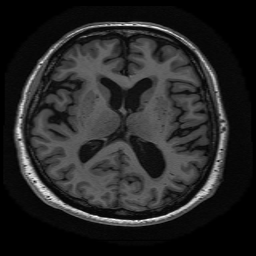

In [26]:
name = input('Enter the type:')
image_index = num_class(name)
print(image_index)
display_image(image_index)

Enter the number:3408


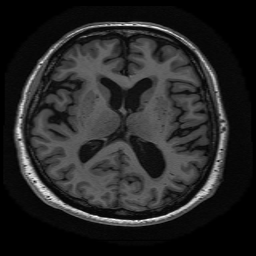

In [27]:
# AD images index = 0 - 1123
# CN images index = 1124 - 2563
# MCI images index = 2564 -5153
# Total images = 5154

# Display based on number
number = input('Enter the number:')
number = int(number)
display_image(number)

# Visualization

<AxesSubplot:>

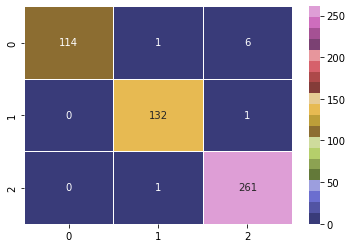

In [29]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='tab20b', linewidths=1, annot=True, fmt='.3g')

In [30]:
count = {'AD': len(y_cat[y_cat[:,0]==1]), 'CN': len(y_cat[y_cat[:,1]==1]), 'MCI': len(y_cat[y_cat[:,2]==1])}
df_count = pd.DataFrame(count, index=[0])
df_count = pd.melt(df_count)

<AxesSubplot:xlabel='variable', ylabel='value'>

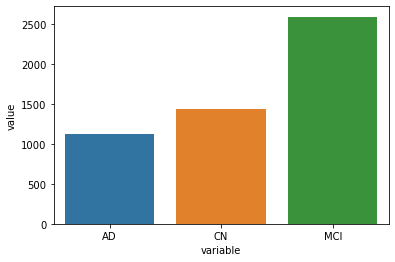

In [31]:
sns.barplot(x=df_count['variable'], y = df_count['value'])

In [33]:
df_results = pd.DataFrame({'Model': ['MSDNN', 'HFCNN', 'ResNet-101', 'ECNN'], 'Accuracy': [75.4, 90.3, 96.3, 98], 'Sensitivity': [73.3, 82.4, 96.7, 98], 'Specificity': [76.2, 96.5, 93.9, 98]})
df_results.melt()

,variable,value
0,Model,MSDNN
1,Model,HFCNN
2,Model,ResNet-101
3,Model,ECNN
4,Accuracy,75.4
5,Accuracy,90.3
6,Accuracy,96.3
7,Accuracy,98.0
8,Sensitivity,73.3
9,Sensitivity,82.4


<AxesSubplot:xlabel='Model', ylabel='value'>

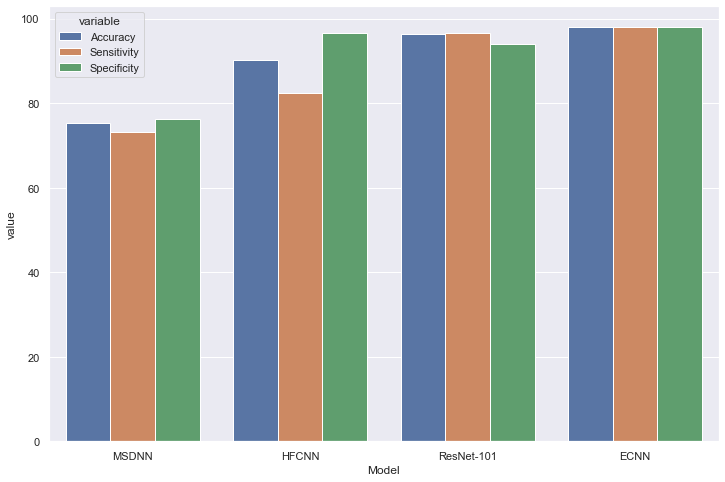

In [34]:
df_results = pd.DataFrame({'Model': ['MSDNN', 'HFCNN', 'ResNet-101', 'ECNN'], 'Accuracy': [75.4, 90.3, 96.3, 98], 'Sensitivity': [73.3, 82.4, 96.7, 98], 'Specificity': [76.2, 96.5, 93.9, 98]})
df_results = pd.melt(df_results, id_vars=['Model'])
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x='Model',y='value', hue='variable', data = df_results)